# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li><a href="#eda">1.	Which genres highest movie release from year to year?</a></li>
        <li><a href="#higestRelease">2.	Which year has the highest release of movies?</a></li>
    </ul>
</li>
<li><a href="#conclusions">Final Conclusion</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

    Here, I had selected the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collection with release year,production detail,budget,runtime,geners,user ratings etc... I would like to find other intresting patterns in the dataset.

### Data Contain
    • Total Rows = 10866
    • Total Columns = 21
    • After Seeing the dataset we can say that some columns is contain null values

### Questions
    1. Which genres highest movie release from year to year?
    2. Which year has the highest release of movies?

In [228]:
# Import all the packages we need in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

    • After doing observation on dataset, I will ask related questions according to that analysis.  
    • Keep that only relevant data, all other data will be removed.

In [229]:
#Look into the dataset for what kind of data available.
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [230]:
#Find how many columns and rows available in dataframe
df.shape

(10866, 21)

In [231]:
#Displays a concise summary of the dataframe,including the number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning (Filtering Columns)
    • Drop unused column
    • Find duplicate column and drop it
    • Change in appropriate column data type
    • Drop 0 and null value data


In [232]:
#Delete unwanted column from dataframe
df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies','cast','vote_count','vote_average'],axis=1,inplace=True)

In [233]:
#check dataframe which column now available in that
df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09


In [234]:
# Convert 'release_date' type from str to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [235]:
# Replace all values of 0 with NAN
df = df.replace(0, np.nan)

In [236]:
#Check now any null value availabe in dataframe or not
len(df[df.genres.isnull()])

23

In [237]:
#Drop null data from dataframe and then check available data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   director        3854 non-null   object        
 6   runtime         3854 non-null   float64       
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
 10  budget_adj      3854 non-null   float64       
 11  revenue_adj     3854 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 391.4+ KB


In [238]:
# Check for duplicates in the data
sum(df.duplicated())

1

In [239]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [240]:
# Check again for duplicates 
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1  (Which genres highest movie release from year to year?)
    • I will work with two variables, release_year and genre column.
    • First I will do seprate genre by '|' (pipe) and then put that unique genre as row and release_year as column, using this prepare one dataframe with the value 0.
    • Now set the total movie count genre wise in relase_year.
    • Prepare chart using that dataframe.Here i prepared two chart first is showing last 10 years most genre release movie year by year

In [241]:
# Definding a function to separate the data in genres column and count the number of movies in each gener 
def separate_data(column):
    split_data =df[column].str.split("|",expand=True,)
    return split_data

In [242]:
#Split Geners by | using split in built function
genreData = separate_data('genres')

In [243]:
#if split gener data not availabe in main data frame then first rename gener data column and then add that column in main data frame 
if df.columns.str.contains('genres_').any() == False:
    genreData.rename(columns={0: "genres_0", 1:'genres_1', 2:'genres_2', 3:'genres_3', 4:'genres_4'},inplace=True)
    df=pd.concat([df,genreData],axis=1,join='inner')

In [244]:
#prepare gener data frame row as unique gener name
print(df.genres_0.unique())

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Thriller' 'Fantasy' 'History' 'Mystery'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie']


In [245]:
#prepare gener data frame column as unique release year
year=-np.sort(-np.array(df['release_year'].unique()))
year

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994,
       1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983,
       1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972,
       1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961,
       1960], dtype=int64)

In [246]:
#Make Null Geners Dataframe with row and column of release year and unique gener with value 0.0
Gener_df = pd.DataFrame(index = df.genres_0.unique(), columns = -np.sort(-np.array(df['release_year'].unique())))
Gener_df = Gener_df.fillna(value = 0.0)

In [247]:
#Fill Gener Dataframe value uning sum of all column release year wise and row as gener name so we can get gener wise total movie count in relase year
row_count=0
for row in (Gener_df.iloc[:,:0].index.to_numpy()):
    column_count=0
    for column in (Gener_df.iloc[:0,:].columns): 
        row_name=str(Gener_df.iloc[:,:0].index.to_numpy()[row_count])
        column_name=int(Gener_df.iloc[:0,:].columns[column_count])
        Gener_df.loc[row_name,column_name] = (len(df.query('genres_0=="{}" & release_year =={}'.format(row_name,column_name)))
                                           + len(df.query('genres_1=="{}" & release_year =={}'.format(row_name,column_name)))
                                           + len(df.query('genres_2=="{}" & release_year =={}'.format(row_name,column_name)))
                                           + len(df.query('genres_3=="{}" & release_year =={}'.format(row_name,column_name)))
                                           + len(df.query('genres_4=="{}" & release_year =={}'.format(row_name,column_name))))
        column_count=column_count+1
    row_count=row_count+1

<b>Last 10 Year Highest Movie Release By Genre </b>

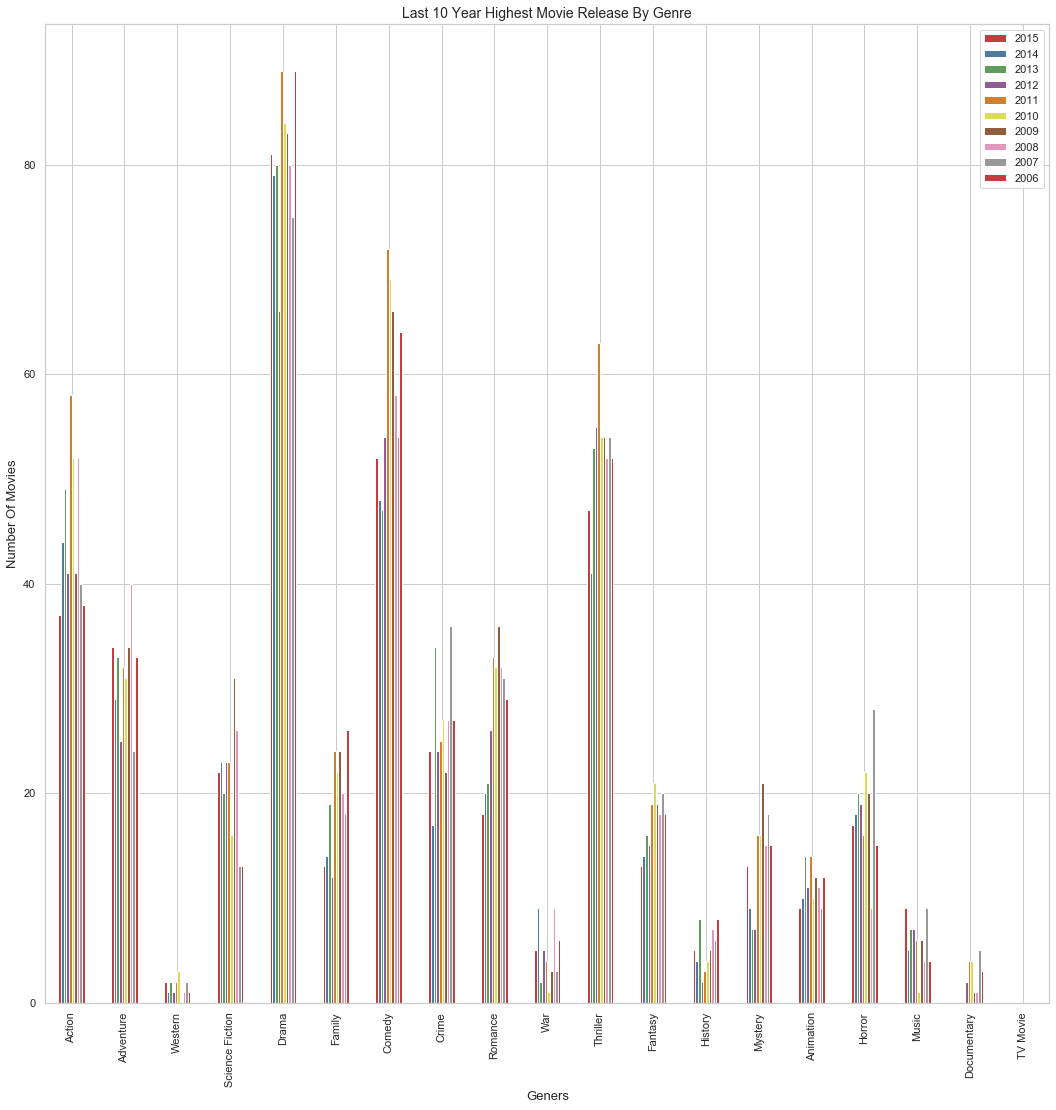

In [255]:
#Last 10 Year Highest Movie Release By Genre
ax = Gener_df.iloc[:,:10].plot.bar();
#set the figure size and labels
plt.title("Last 10 Year Highest Movie Release By Genre",fontsize = 14)
plt.xlabel('Geners',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
plt.show()
#set the style sheet
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")

<b> Highest Movie Release Genre Year By Year</b>

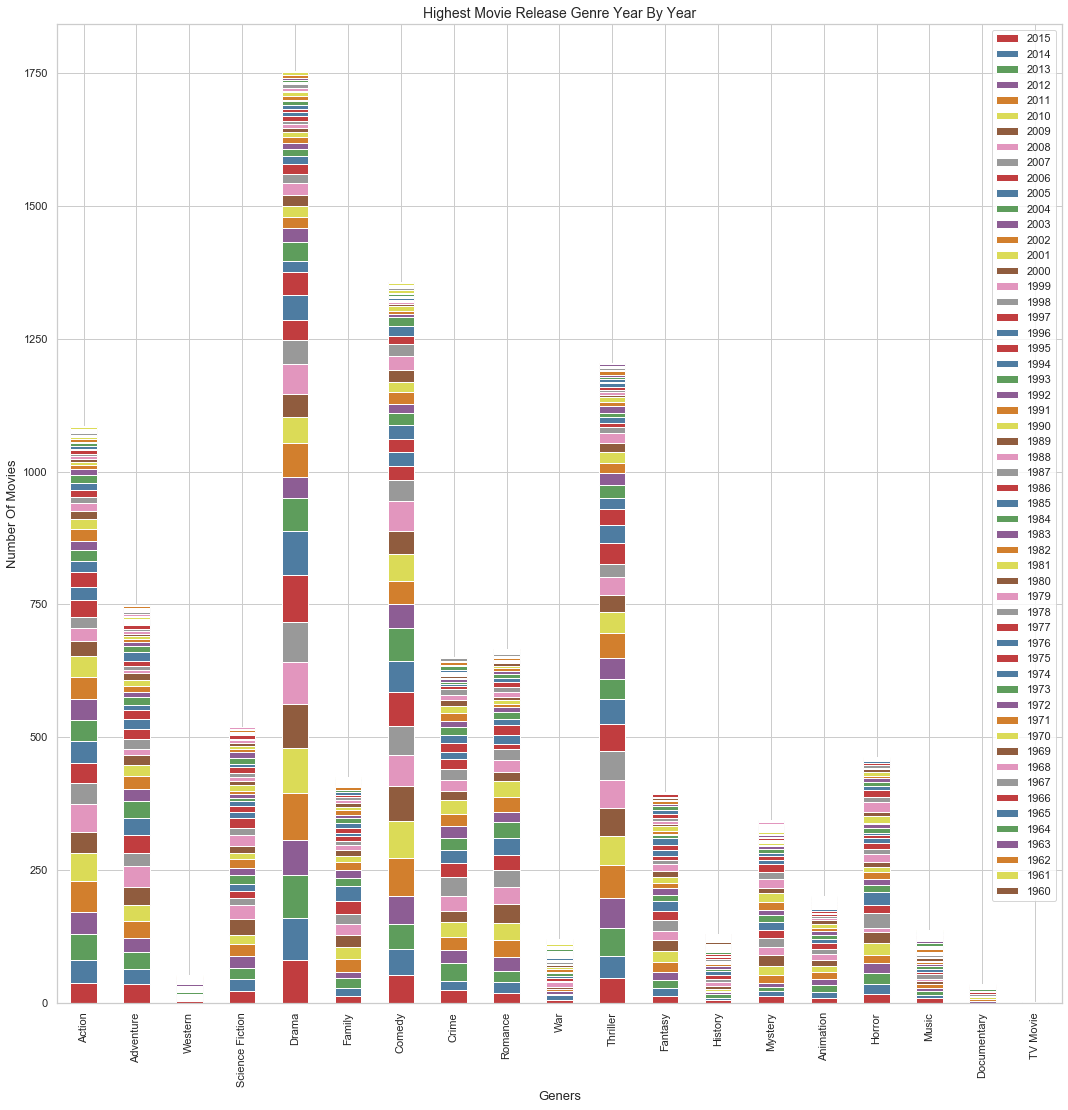

In [257]:
#Most Popular Genre Year By Year
ax = Gener_df.plot.bar(stacked=True);
#set the figure size and labels
plt.title("Highest Movie Release Genre Year By Year",fontsize = 14)
plt.xlabel('Geners',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
plt.show()
#set the style sheet
sns.set(rc={'figure.figsize':(18,18)})
sns.set_palette("Set1", 20, .65)
sns.set_style("whitegrid")

### Conclusion

    • Drama genre has the highest number of movies like 1750.
    • Second highest total number of movie genre is comedy approx 1350 total movies.
    • Drama, comedy, thriller, action and romance, these are the most frequently produced genres it does not necessarily mean that they are the most profitable genres.
 



<a id='higestRelease'></a>
### Research Question 2  (Which year has the highest release of movies?)
    • I will work with two variables, The main varible is the release_year and the sub varible is the number of movies.
    • Now I will calculate the number of movies in each year by value_counts() using release_years column, and sort years by sort_index().
    • Prepare chart using that dataframe

In [250]:
# count the number of movies in each year then sort the result
data= df["release_year"].value_counts().sort_index()
print(data.tail())

2011    199
2012    158
2013    180
2014    165
2015    160
Name: release_year, dtype: int64


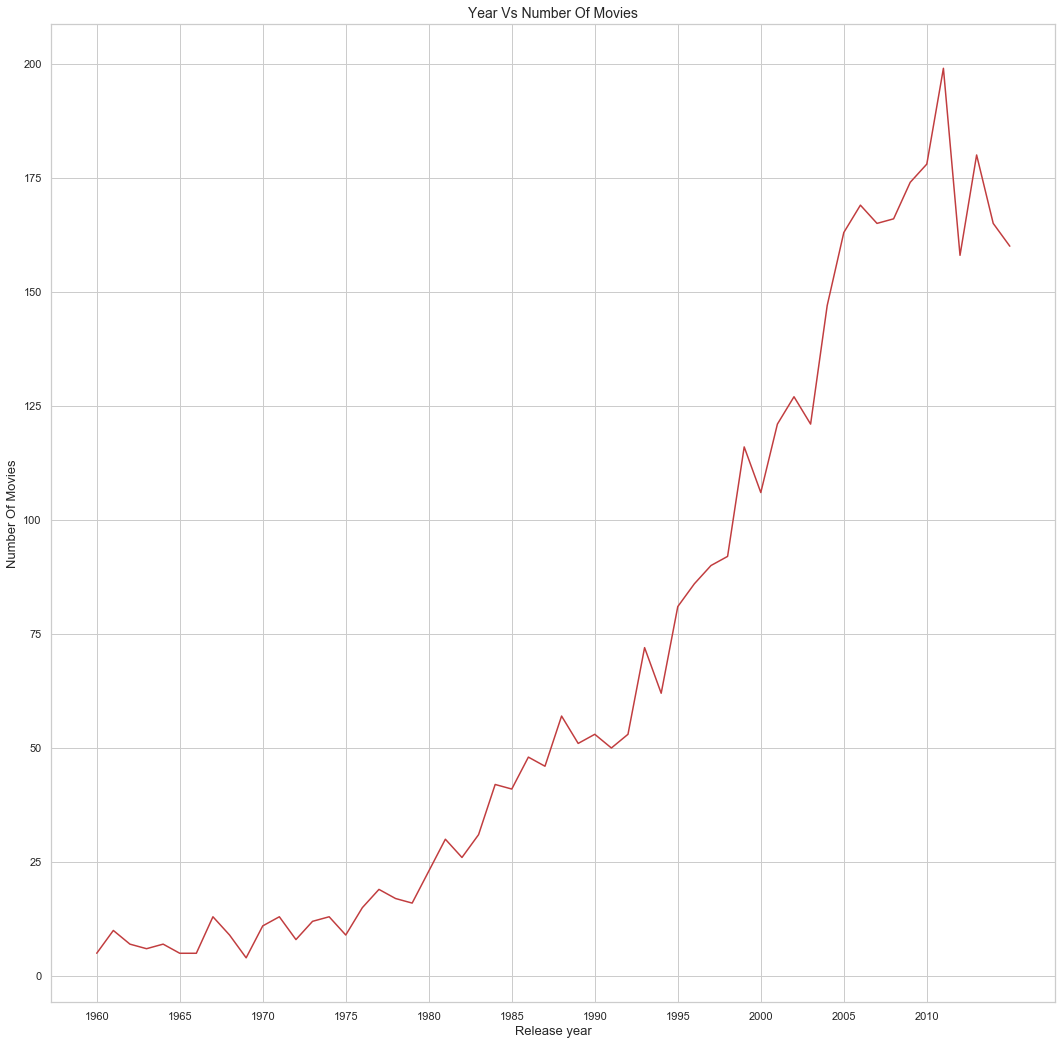

In [251]:
df.groupby('release_year').count()['id'].plot(xticks = np.arange(np.min(np.array(df['release_year'].unique())),np.max(np.array(df['release_year'].unique())),5))
#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid")

### Conclusion

    • Number of movies increase over years.
    • According to graph from year 2000 to 2015 movie industry growing so much fast.

<a id='conclusions'></a>
## Final Conclusion
    • Drama is the most relese movie genre, following by action, comedy and thriller.
    • Western, TV Movie and Documentary are three least-made genres.
    • Maximum Number Of Movies Release In year 2014.
    • Year 2000 to 2015 is best period for the movie industry.

<a id='limitations'></a>
## Limitations
    • In data there is a lot missing values, it affects the results.
    • Budget and revenue column contain 0 value.
    • Duplicate value is available so it will affect data.
    • In appropriate datatype
